# Проект. Сборный проект - 1. Исследование игровых платформ

## Глава 0. Входные данные
### Описание проекта
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  

#### Путь к файлу:
 - /datasets/games.csv

#### Описание данных таблицы
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы долларов)  
`EU_sales` — продажи в Европе (миллионы долларов)  
`JP_sales` — продажи в Японии (миллионы долларов)  
`Other_sales` — продажи в других странах (миллионы долларов)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг   компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.  

## Глава 1. Открытие файла с данными и изучение общей информации

Вызовем все необходимые библиотеки для реализации проекта

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import numpy as np
import math as mt
from scipy import stats as st
from scipy.stats import norm

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


>Присутствуют пропуски в столбцах `Name`, `Platform`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`  
Данные столбца `Year_of_Release` привести к целочисленному формату   
Данные столбца `User_Score` привести из строкового в числовой  
Проверить данные столбца `Critic_Score` на необходимость дробной записи

### Выводы по главе 1:

В данных присутствуют пропуски, необходимо определить природу их возникновения и принципы замены, при необходимости. Привести столбец с годом релиза к целочисленному формату. Названия столбцов привести к нижнему регистру. Изменить формат данных столбцов при необходимости

## Глава 2. Подготовка данных

### Заменим названия столбцов. Преобразуем данные в нужные типы. Обработаем пропуски

Проверим таблицу на дубликаты, используя метод `.duplicated()` и суммировав методом `.sum()`

In [3]:
df.duplicated().sum()

0

Приведем названия столбцов к нижнему регистру

In [4]:
df.columns = [x.lower() for x in df.columns]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим таблицу на пропуски, используя метод `.isnull()` и суммировав методом `.sum()`

In [5]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Найдем пропуски в `name` и `genre`:

In [6]:
df.sort_values(by='genre').tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14108,Railroad Tycoon 3,PC,2003.0,Strategy,0.00,0.03,0.00,0.00,80.0,7.7,E
15384,Order of War,PC,2009.0,Strategy,0.00,0.01,0.00,0.00,69.0,7.3,T
11864,Commandos 2: Men of Courage,XB,2002.0,Strategy,0.05,0.02,0.00,0.00,67.0,8.4,T
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


>Имеем 2 пропуска в `name` и `genre` на 2-х строчках. Заполнить их не сможем по имеющимся данным, в то же время имеют ценность по продажам для платформы GEN  
Для столбцов `year_of_release`, `critic_score`, `user_score`, `rating` оставим пропуски как есть

Напишем цикл для замены пропусков в `year_of_release` на медианы годов выпуска игр по каждой платформе и заменим данные на целочисленные.

In [7]:
for item in df['platform'].unique():
    filter_flags = df['year_of_release'].isna() & (df['platform'] == item)
    df.loc[filter_flags, 'year_of_release'] = df.loc[df['platform'] == item, 'year_of_release'].median()
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверим значения столбца `name` на уникальность, те самым определим максимальное количество платформ для одной игры

In [9]:
df['name'].value_counts().head(10)

Need for Speed: Most Wanted                12
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Madden NFL 07                               9
LEGO The Hobbit                             8
LEGO Jurassic World                         8
LEGO Star Wars II: The Original Trilogy     8
Madden NFL 08                               8
FIFA 15                                     8
Name: name, dtype: int64

Проверим столбцы `platform`, `year_of_Release`, `genre`, `critic_Score`, `user_score`, `rating` на уникальность, используя метод `.unique()` чтобы проверить данные на аномальные значения

In [10]:
[x.unique() for x in (df['platform'], df['year_of_release'], df['genre'], df['critic_score'], df['user_score'], df['rating'])]

[array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
        'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
        'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
        '3DO', 'GG', 'PCFX'], dtype=object),
 array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
        2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
        1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
        1981, 1987, 1980, 1983]),
 array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
        'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
        'Strategy', nan], dtype=object),
 array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
        83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
        71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
        75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       

>Год нужно привести к целочисленному формату, в оценках пользователей присутствуют 'tbd', рейтинг от организации ESRB разобраться со значениями

Согласно источнику в википедии [Рейтинг игр ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) имеет следующую классификацию:
 - **«EC» («Early childhood»)** — «Для детей младшего возраста»
 - **«E» («Everyone»)** — «Для всех» (Первоначально "K-A" ("Kids to Adults"))
 - **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»
 - **«T» («Teen»)** — «Подросткам»
 - **«M» («Mature»)** — «Для взрослых»
 - **«AO» («Adults Only 18+»)** — «Только для взрослых»
 - **«RP» («Rating Pending»)** — «Рейтинг ожидается»  
 
 Заменим **K-A** на **E**

In [11]:
df['rating'] = df['rating'].replace('K-A', 'E')

Приведем значения столбца `critic_score` к такому же как `user_score` для удобства сравнения

In [12]:
df['critic_score'] = df['critic_score'] / 10

Столбец `critic_score` имеет значения **tbd**("to be determined", "to be defined"), что означает игра еще не имеет рейтинга и будет оценена как только появится достаточно отзывов о игре. Поэтому заменим эти значения на **NaN** и приведем данные к числовому типу, используя `.to_numeric`

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Выводы по главе 2:

В столбце `year_of_release` присутствовали пропуски, вероятнее всего образовавшиеся при выгрузке данных, т.к. каждая игра имеет дату релиза, были заменены на медианы резила по каждой платформе. Также возможно возникли пропуски в `name` и `genre`, но они не имеют особого веса, значение всего 2. Пропуски в `critic_score`, `user_score` и `rating` имеют естественную природу возникновения - данных нет для более старых игр.

## Глава 3. Исследовательский анализ данных

### Посчитаем сколько игр выпускалось в разные годы

Составим сводную таблицу по количеству выпущенных игр по годам и построим гистограмму по количеству и график по продажам в каждом году 

In [15]:
games_per_year = df.pivot_table(columns='year_of_release', values='name', aggfunc=['count'])
games_per_year

count                                               ...        \
year_of_release  1980 1981 1982 1983 1984 1985 1986 1987 1988 1989  ...  2007   
name                9   46   53   17   14   14   21   16   15   17  ...  1197   

                                                                  
year_of_release  2008  2009  2010  2011 2012 2013 2014 2015 2016  
name             1457  1476  1302  1161  653  552  582  606  502  

[1 rows x 37 columns]

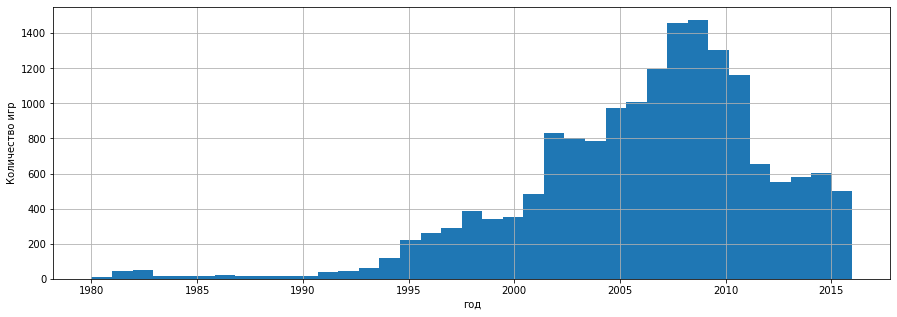

In [16]:
df['year_of_release'].hist(bins=len(df['year_of_release'].unique()), figsize=(15,5)).set(xlabel='год', ylabel='Количество игр');

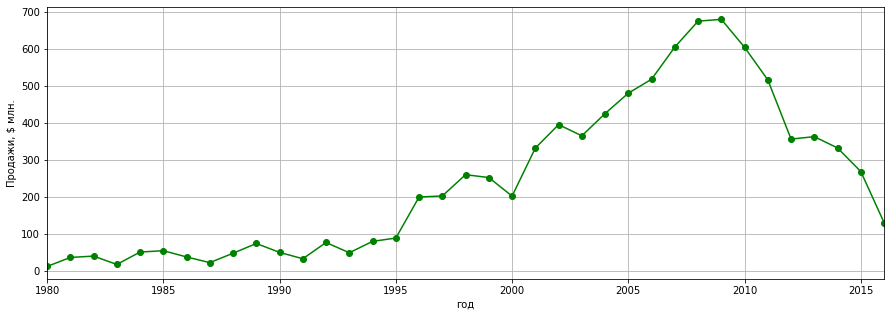

In [17]:
sales_per_year = df.pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum'])
sales_per_year.plot(style='o-',figsize=(15,5), c='g', grid=True, legend=False).set(xlabel='год', ylabel='Продажи, $ млн.');

>По гистограмме видно, что после 2011 года был резкий спад по поличеству выпущенных игр, что подтверждается и продажами. Разработчики перешли от количества к качеству, т.к. пользователи стали более требовательны к качеству игр

### Определим как меняются продажи по платформам и  платформы с наибольшими суммарными продажами. 

Построим сводну таблицу продаж каждой платформы по годам: 

In [18]:
sales_per_platform = df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
sales_per_platform.fillna('')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,39.38,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,,,,,,,,,,
3DO,,,,,,,,,,,...,,,,,,,,,,
3DS,,,,,,,,,,,...,,,,,63.2,51.36,57.76,43.76,27.78,15.14
DC,,,,,,,,,,,...,0.02,0.04,,,,,,,,
DS,,,,,,0.02,,,,,...,146.94,148.65,119.54,85.02,26.18,11.01,1.54,,,
GB,,,,,,,,,1.43,64.97,...,,,,,,,,,,
GBA,,,,,,,,,,,...,3.4,,,,,,,,,
GC,,,,,,,,,,,...,0.27,,,,,,,,,
GEN,,,,,,,,,,,...,,,,,,,,,,


Определим топ-10 платформ по продажам за все время:

In [19]:
top_10_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [20]:
top_10_platforms_names = [i for i in top_10_platforms.index]
top_10_platforms_names

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

Построим графики продаж по годам для каждой платформы 

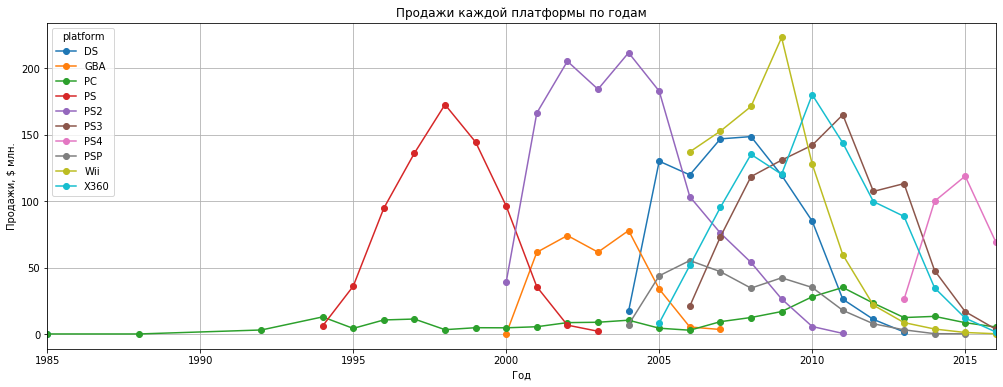

In [21]:
sales_top_10_platform = (df.query('platform == @top_10_platforms_names')
                           .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                           .plot(style='o-', grid= True, legend=True, figsize=(17,6))
                           .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи каждой платформы по годам')
                            )

Определим продолжительность нахождения каждой платформы на рынке:

In [22]:
years_for_platform = (df.query('platform == @top_10_platforms_names')                        
                       .pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum'))
years_for_platform.reset_index(inplace=True)
years_for_platform = years_for_platform.pivot_table(index='platform', values='year_of_release', aggfunc='count')

Определим за какой характерный срок появляются новые и исчезают старые платформы по медиане продолжительности нахождения каждой платформы на рынке

In [23]:
#years_for_platform.median()

bool_series = pd.isnull(sales_per_platform[2016])
years_for_ded_platforms = sales_per_platform[bool_series]
ded_platforms_names = [i for i in years_for_ded_platforms.index]
years_for_ded_platforms1 = (df.query('platform == @ded_platforms_names')                        
                       .pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum'))
years_for_ded_platforms1.reset_index(inplace=True)
years_for_ded_platforms2 = years_for_ded_platforms1.pivot_table(index='platform', values='year_of_release', aggfunc='count')
years_for_ded_platforms2.median()

year_of_release    7.0
dtype: float64

<div style="border:solid black 2px; padding: 20px">
<div class="alert alert-info">
    
> Актуальный период для исследований для 2017 года, период с 2014 года, т.е. 3 года, при том что каждая платформа проводит около **7** лет на рынке, однако компьютерные игры - очень инновационная отрасль, где каждый год случается революция, одна технология сменяет другую, да и экономические условия каждый год немного меняются

### Определим платформы лидирующие по продажам, а также потенциально прибыльные платформы.

Построим график продаж по каждой платформе в актуальном периоде(с 2012г.)

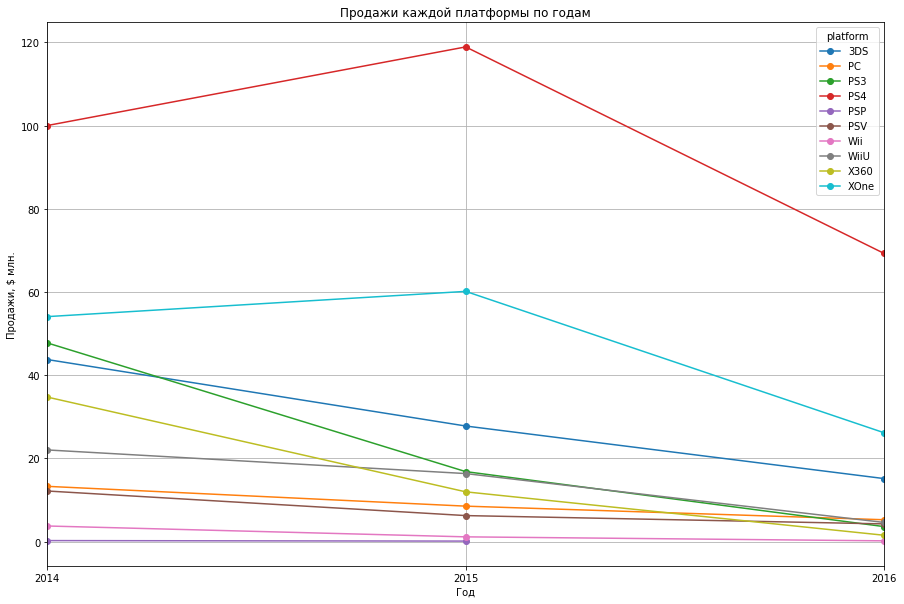

In [24]:
(df.query('year_of_release >= 2014')
   .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
   .plot(style='o-', grid= True, legend=True, figsize=(15,10), xticks = ([2014, 2015, 2016]))
   .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи каждой платформы по годам')
);

>Из всех платформ только PS4, XOne на восходязем тренде, остальные в нисходящем тренде.

Сделаем срез по продажам платформ в 2015г, т.к. данные за 2016г. не полные:

In [25]:
sales_in_2016 = (df.query('year_of_release == 2015')
                   .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .sort_values(by='total_sales', ascending=False))
sales_in_2016

,total_sales
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


Исходя из данных среза и графика выше, делаем вывод о потенциально прибыльных платформах:

In [26]:
actual_platform_list = [i for i in sales_in_2016[:8].index]
actual_platform_list

['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'X360', 'PC', 'PSV']

### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

Построим сводную таблицу по продажам каждой игры с разбивкой по платформам и посчитаем общие продажи по каждой игре

In [27]:
actual_platform_sales = (df.query('year_of_release >= 2014 and platform == @actual_platform_list')
                     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
                  )

actual_platform_sales['game_platforms_total'] = actual_platform_sales.sum(axis=1)
actual_platform_sales.sort_values(by='game_platforms_total', ascending=False)

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne,game_platforms_total
name,,,,,,,,,
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,1.70,7.39,25.67
Call of Duty: Advanced Warfare,NaN,0.41,4.36,7.66,NaN,NaN,4.28,5.26,21.97
Grand Theft Auto V,NaN,1.17,NaN,12.62,NaN,NaN,NaN,5.47,19.26
FIFA 15,0.46,0.29,4.28,6.08,0.60,NaN,2.92,2.18,16.81
FIFA 16,NaN,0.20,2.70,8.58,NaN,NaN,1.57,3.25,16.30
...,...,...,...,...,...,...,...,...,...
Hyakka Yakou,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01
Raven's Cry,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.01
Infinite Stratos 2: Love and Purge,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01


Пjстроим диаграмму размаха для продаж каждой игры и с разбивкой по платформам:

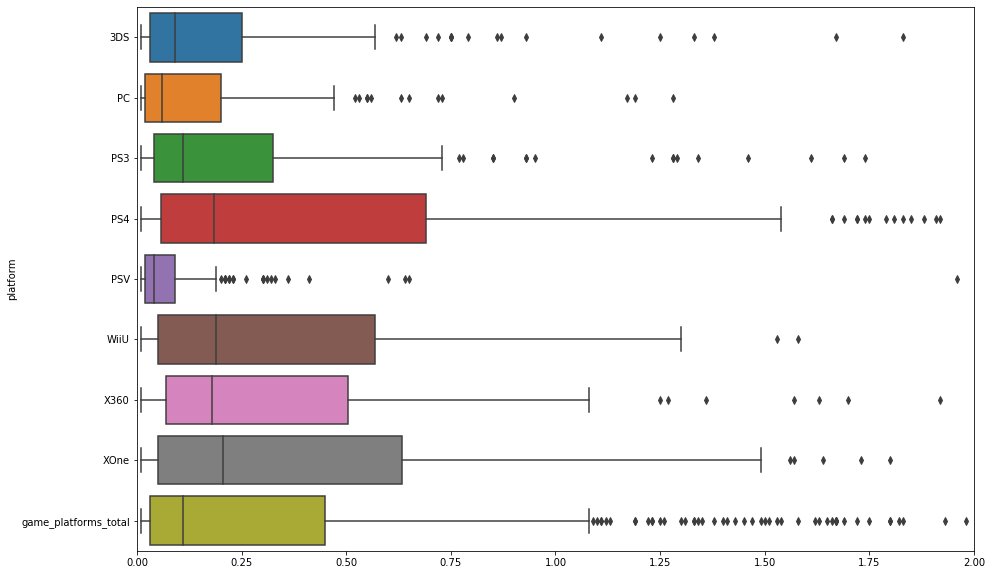

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_platform_sales, orient='h').set(xlim = (0, 2));

Вызвав метод `.describe()` получим данные по каждой платформе и по глобальным продажам

In [29]:
actual_platform_sales.describe()

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne,game_platforms_total
count,212.000000,151.000000,219.000000,376.000000,296.000000,73.000000,111.000000,228.000000,948.000000
mean,0.408868,0.179139,0.311324,0.766356,0.076554,0.588767,0.434414,0.615614,0.764008
std,1.188368,0.329359,0.633059,1.614969,0.141755,1.161467,0.628967,1.046513,2.141559
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.020000,0.050000,0.070000,0.050000,0.030000
50%,0.090000,0.060000,0.110000,0.185000,0.040000,0.190000,0.180000,0.205000,0.110000
75%,0.250000,0.200000,0.325000,0.690000,0.090000,0.570000,0.505000,0.632500,0.450000
max,11.680000,3.050000,5.270000,14.630000,1.960000,7.090000,4.280000,7.390000,25.670000


>Исходя из данных можно сделать выводы:
- по медианым и средним значениям продаж лидируют PS3, PS4, WiiU, X360, XOne
- Максимальные продажи одной игры 3DS, PS3, PS4, X360


### Определим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Определим самую прибыльнуюплатформу с ~~2012~~ **2014** года

In [30]:
(df.query('year_of_release >= 2014')
  .pivot_table(index='platform', values='total_sales', aggfunc='sum')
  .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.66
Wii,5.07


Построим срез по этой платформе, найдем корреляцию продаж от отзывов критиков и пользователей и построим матрицу корреляции:

In [31]:
ps4_score_influence = (df.query('year_of_release >= 2014 & platform == "PS4" ')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])

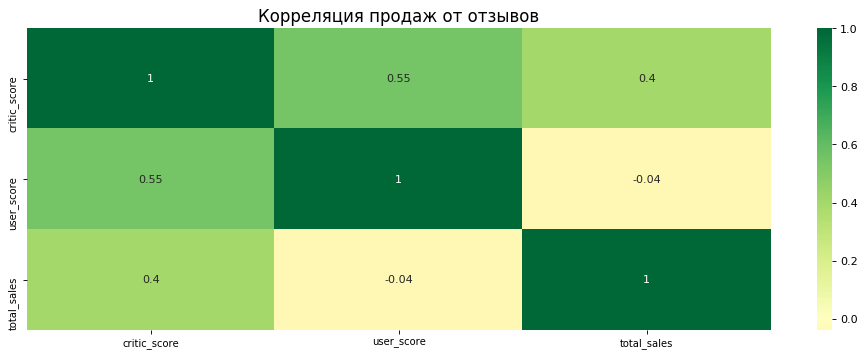

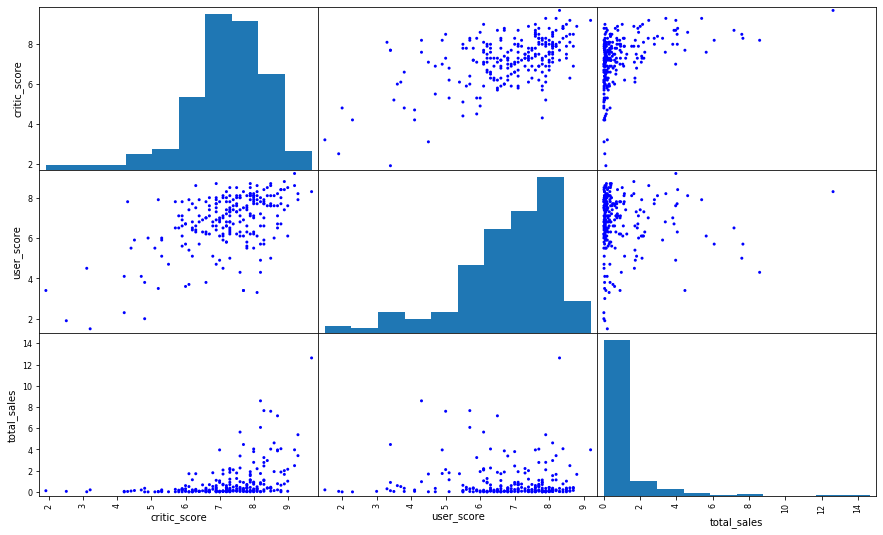

In [32]:
plt.figure(figsize=(15,5), dpi= 80)
sns.heatmap(ps4_score_influence.corr(), xticklabels=ps4_score_influence.corr().columns, yticklabels=ps4_score_influence.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция продаж от отзывов', fontsize=15)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

pd.plotting.scatter_matrix(ps4_score_influence, figsize=(15, 9), alpha=1, c='b');

> - Корреляция в 0.4 между отзывами критиков и продажами говорит о наличии связи, однако не слишком сильной. Выходит, увеличение оценки критиков сопровождается увеличением в продажах, но так бывает не всегда.  
- В тоже время корреляция между отзывами критиков и пользователей равна 0.55, говорит что пользователи и критики зачастую сходятся в оценке, но не всегда  
- Корреляция между отзывами пользователей и продажами не влияют друг на друга

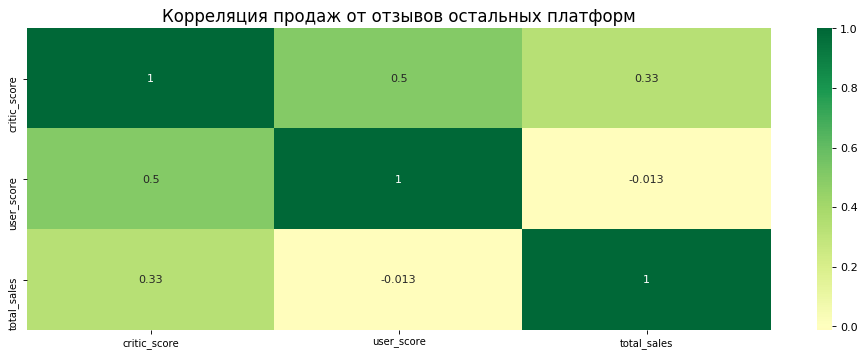

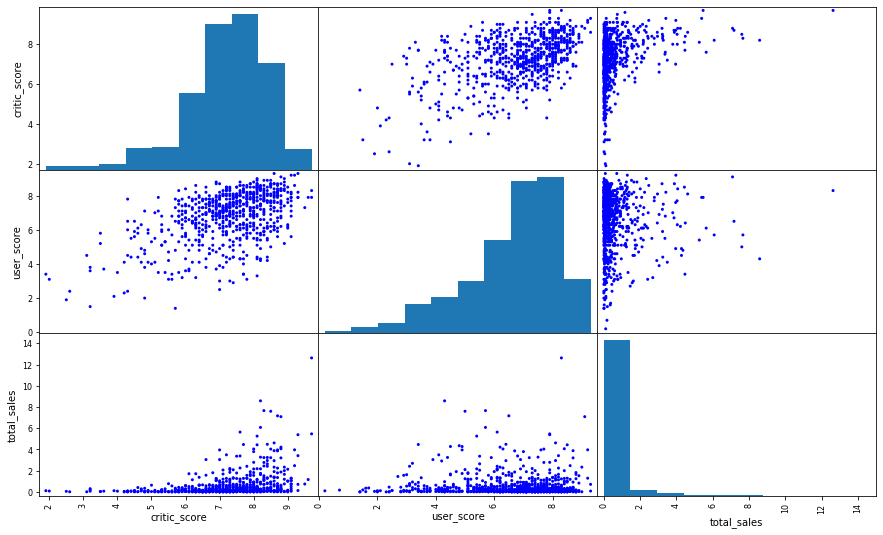

In [33]:
other_score_influence = (df.query('year_of_release >= 2014')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])
plt.figure(figsize=(15,5), dpi= 80)
sns.heatmap(other_score_influence.corr(), xticklabels=other_score_influence.corr().columns, yticklabels=other_score_influence.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция продаж от отзывов остальных платформ', fontsize=15)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

pd.plotting.scatter_matrix(other_score_influence, figsize=(15, 9), alpha=1, c='b');

> - Корреляция в 0.33 между отзывами критиков и продажами (еще меньше) говорит о наличии связи, однако не слишком сильной. Выходит, увеличение оценки критиков сопровождается увеличением в продажах, но так бывает не всегда.  
- В тоже время корреляция между отзывами критиков и пользователей равна 0.5 (еще меньше), говорит что пользователи и критики зачастую сходятся в оценке, но не всегда  
- Корреляция между отзывами пользователей и продажами не влияют друг на друга

### Определим общее распределение игр по жанрам.

Построим сводную таблицу по продажам и количеству выпущенных игр по жанрам 

In [34]:
sales_per_genre = (df.query('year_of_release >= 2014')
                    .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count']))
sales_per_genre.columns = ['Продажи, $ млн.', 'Количество игр, шт.']
sales_per_genre.reset_index(inplace=True)
sales_per_genre.sort_values(by='Продажи, $ млн.', inplace=True, ascending=False)
sales_per_genre

,genre,"Продажи, $ млн.","Количество игр, шт."
0,Action,199.36,619
8,Shooter,170.94,128
10,Sports,109.48,161
7,Role-Playing,101.70,222
3,Misc,37.55,113
2,Fighting,28.22,60
6,Racing,27.52,69
4,Platform,18.09,38
1,Adventure,17.55,185
9,Simulation,13.13,44


И графики продаж и количеству выпущенных игр по сводной таблице

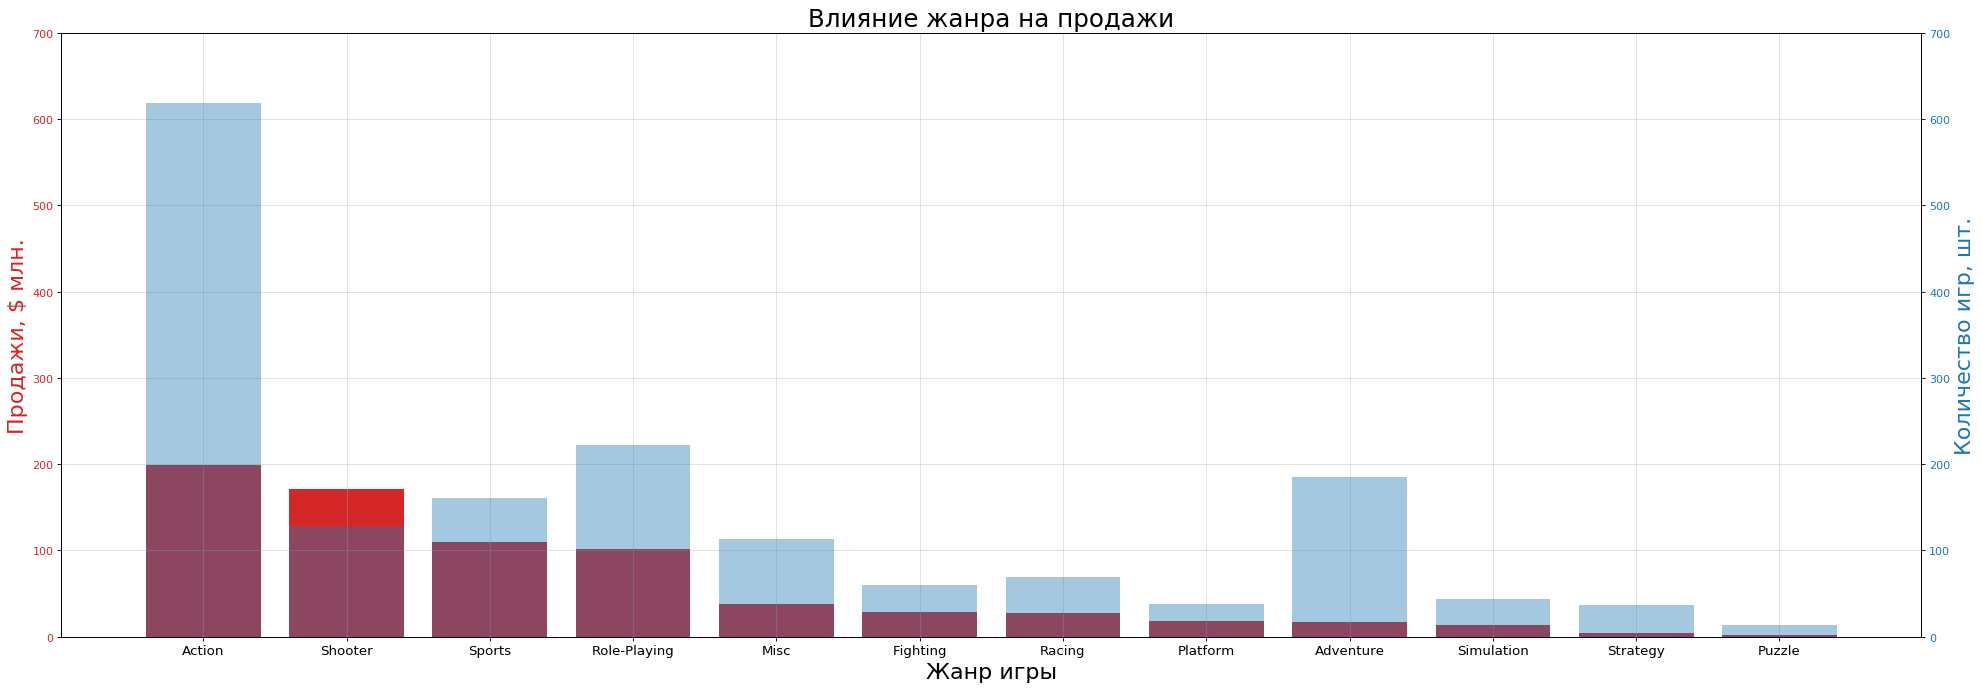

In [35]:
"""
x = sales_per_genre['genre']
y1 = sales_per_genre['Продажи, $ млн.']
y2 = sales_per_genre['Количество игр, шт.']

fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 80)
ax1.plot(x, y1, color='tab:red')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue')

# ax1 (left Y axis)
ax1.set_xlabel('Жанр игры', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Продажи, $ млн.', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel('Количество игр, шт.', color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title('Влияние жанра на продажи', fontsize=22)

plt.show()
"""
x = sales_per_genre['genre']
y1 = sales_per_genre['Продажи, $ млн.']
y2 = sales_per_genre['Количество игр, шт.']

fig, ax1 = plt.subplots(1,1,figsize=(30,10), sharey = True , dpi= 80)
ax1.bar(x, y1, color='tab:red')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='tab:blue' , alpha = 0.4)

# ax1 (left Y axis)
ax1.set_xlabel('Жанр игры', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Продажи, $ млн.', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)
ax1.set(ylim = [0, 700])

# ax2 (right Y axis)
ax2.set_ylabel('Количество игр, шт.', color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title('Влияние жанра на продажи', fontsize=22)
ax2.set(ylim = [0, 700])

plt.show()

Самые прибыльные жанры Action, Shooter, Role-Playing, Sports  
Самые низкие продажи Pazzle, Strategy, Adventure, Simulation

### Выводы по главе 3:

- в общем срок нахождения платформы на рынке около ~~11~~ **7** лет. В то же время с ~~2012~~ **2014** года резкий спад по количеству выпущенных игр и продаж от них. Пользователи стали более требовательны к качеству игр и разработчики перешли от количества к качеству самих игр
- Из всех платформ только PS4, XOne на восходящем тренде, остальные в нисходящем тренде.
- Потенциально прибыльные платформы PS4, XOne, 3DS, PS3, WiiU, X360, PC, PSV
- По продажам лидируют PS3, PS4, WiiU, X360, XOne
- Отзывы критиков влияют на продажи(как правило они выходят до релиза и разогревают интерес к ингре), но не всегда. А отзывы пользователей не влияют на продажи, т.к. часто выходят долгожданные и прибыльные, но провальные (по отзывам) игры
- Высокие продажи в жанрах Action, Shooter, Role-Playing, Sports, низкие в Pazzle, Strategy, Adventure, Simulation

## Глава 4. Определение портрета пользователя по разным регионам

Напишем следующие функции:
- top_5_platforms_of_region - строит распределение по топ-5 платформам региона
- top_5_genres_of_region - строит распределение по топ-5 жанрам региона
- influence_ESRB - влияние рейтинга ESRB на продажи

In [36]:
def top_5_platforms_of_region(df, column):
    top_5_platforms = df.groupby('platform')[column].sum().sort_values(ascending=False).head()
    top_5_platforms
    fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(17,7))
    ax2.yaxis.tick_right()
    (top_5_platforms.plot(autopct='%1.1f%%', kind='pie', ax=ax, title='Доля продаж по платформам', legend=False, figsize=(7, 7))
                    .set(ylabel=''))
    top_5_platforms.plot.bar(ax=ax2, color='tab:red').set(ylabel='Продажи, $ млн.');
    return top_5_platforms

In [37]:
def top_5_genres_of_region(df, column):
    top_5_genres = df.groupby('genre')[column].sum().sort_values(ascending=False).head()
    top_5_genres
    fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(17,7))
    ax2.yaxis.tick_right()
    (top_5_genres.plot(autopct='%1.1f%%', kind='pie', ax=ax, title='Доля продаж по жанрам', legend=False, figsize=(7, 7))
                 .set(ylabel=''))
    top_5_genres.plot.bar(ax=ax2, color='tab:red').set(ylabel='Продажи, $ млн.');
    return top_5_genres

In [38]:
def influence_ESRB(df, column):
    sales_per_rating = df.pivot_table(index='rating', values=column, aggfunc=['sum', 'count'])
    sales_per_rating.columns = ['Продажи, $ млн.', 'Количество игр, шт.']
    sales_per_rating.reset_index(inplace=True)
    sales_per_rating.sort_values(by='Продажи, $ млн.', inplace=True)
    
    """
    x = sales_per_rating['rating']
    y1 = sales_per_rating['Продажи, $ млн.']
    y2 = sales_per_rating['Количество игр, шт.']

    fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 80)
    ax1.plot(x, y1, color='tab:red')

    ax2 = ax1.twinx()
    ax2.plot(x, y2, color='tab:blue')

    # ax1 (left Y axis)
    ax1.set_xlabel('Рейтинг ESRB', fontsize=20)
    ax1.tick_params(axis='x', rotation=0, labelsize=12)
    ax1.set_ylabel('Продажи, $ млн.', color='tab:red', fontsize=20)
    ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
    ax1.grid(alpha=.4)

    # ax2 (right Y axis)
    ax2.set_ylabel('Количество игр, шт.', color='tab:blue', fontsize=20)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title('Влияние рейтинга ESRB на продажи', fontsize=22)

    plt.show()
    """
    x = sales_per_rating['rating']
    y1 = sales_per_rating['Продажи, $ млн.']
    y2 = sales_per_rating['Количество игр, шт.']

    fig, ax1 = plt.subplots(1,1,figsize=(30,10), sharey = True , dpi= 80)
    ax1.bar(x, y1, color='tab:red')

    ax2 = ax1.twinx()
    ax2.bar(x, y2, color='tab:blue' , alpha = 0.4)

    # ax1 (left Y axis)
    ax1.set_xlabel('Рейтинг ESRB', fontsize=20)
    ax1.tick_params(axis='x', rotation=0, labelsize=12)
    ax1.set_ylabel('Продажи, $ млн.', color='tab:red', fontsize=20)
    ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
    ax1.grid(alpha=.4)
    ax1.set(ylim = [0, 500])

    # ax2 (right Y axis)
    ax2.set_ylabel('Количество игр, шт.', color='tab:blue', fontsize=20)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title('Влияние рейтинга ESRB на продажи', fontsize=22)
    ax2.set(ylim = [0, 500])

    plt.show()
    
    return sales_per_rating

### Регион NA (North America)

Построим сводную таблицу по продажам игр для региона Северная Америка

In [39]:
na_region = (df.query('year_of_release >= 2014 & na_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'rating']])
na_region

,name,platform,year_of_release,genre,na_sales,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,NaN
77,FIFA 16,PS4,2015,Sports,1.12,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,NaN
...,...,...,...,...,...,...
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,M
16553,Farming Simulator 2014,PSV,2014,Simulation,0.01,NaN
16618,Xblaze: Lost Memories,PSV,2015,Adventure,0.01,M
16660,Prison Architect,XOne,2016,Action,0.01,NaN


Топ-5 по продажам платформ:

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

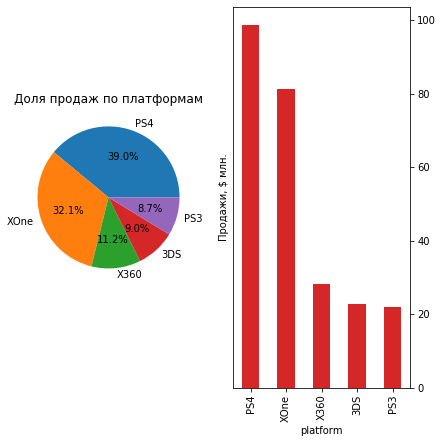

In [40]:
top_5_platforms_of_region(na_region, 'na_sales')

Топ-5 по продажам жанров:

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.58
Misc            15.05
Name: na_sales, dtype: float64

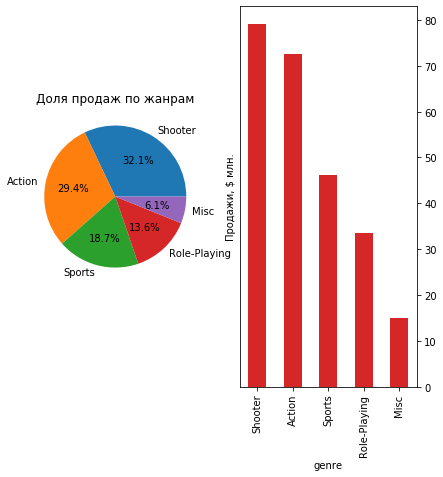

In [41]:
top_5_genres_of_region(na_region, 'na_sales')

Влияние рейтинга ESRB на продажи:

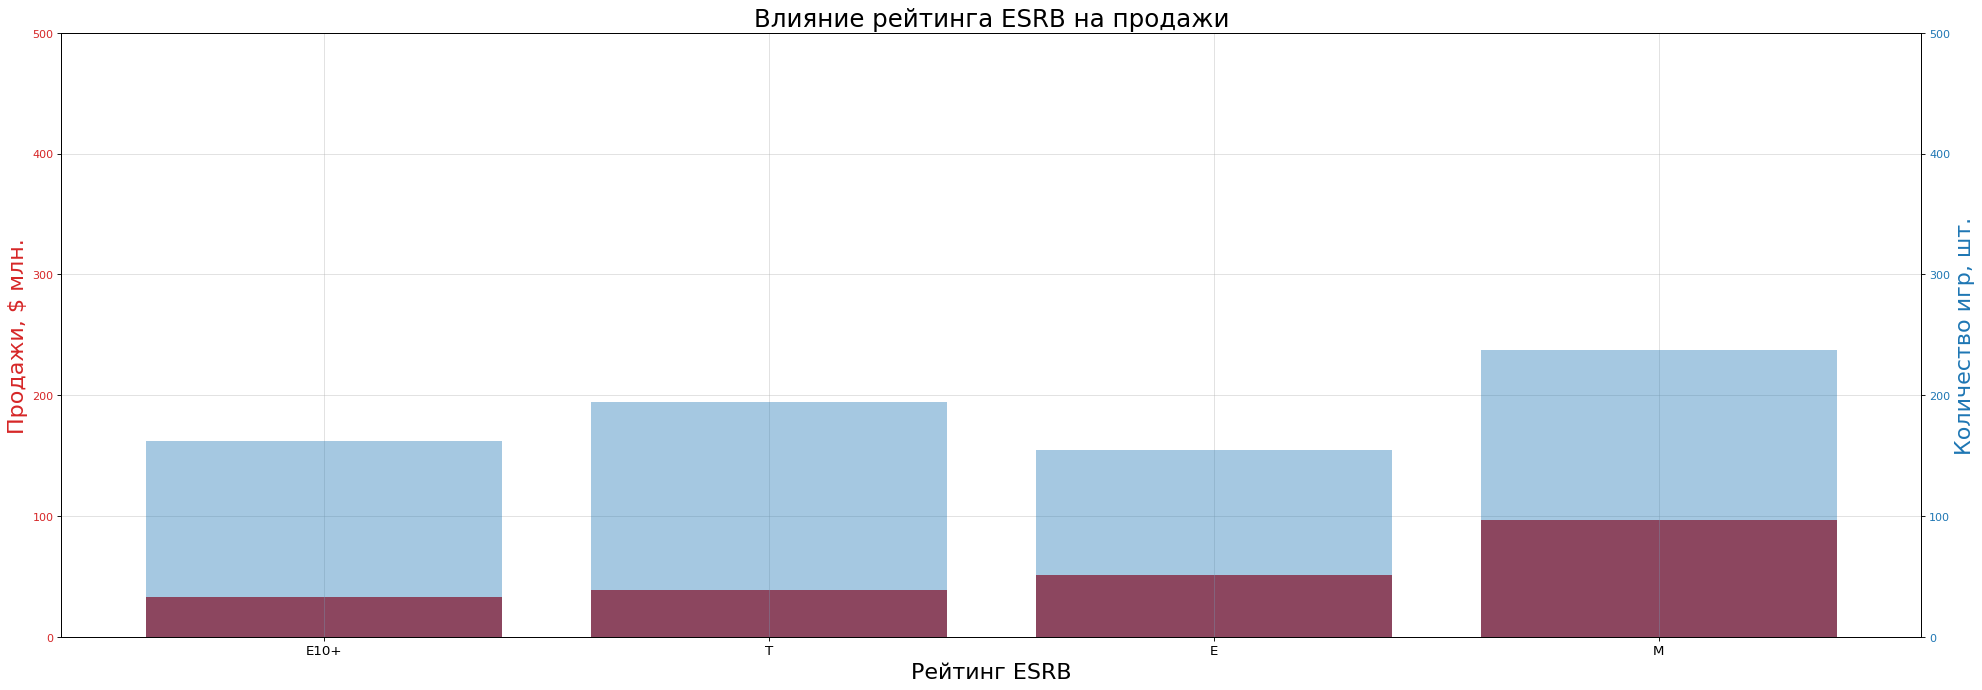

,rating,"Продажи, $ млн.","Количество игр, шт."
1,E10+,33.23,162
3,T,39.06,194
0,E,50.74,155
2,M,96.42,237


In [42]:
influence_ESRB(na_region, 'na_sales')

>Пользователи в Северной Америке предпочитают, в большей части, платформы ~~X360~~ **PS4**, меньше XOne, X360, 3DS, PS3.  
Жанры Action и Shooter  
Максимальный по продажам рейтинг ESRB: "M" - для взрослых


### Регион EU (Europa)

Проделаем тоже самое для региона Европа:

In [43]:
eu_region = (df.query('year_of_release >= 2014 & eu_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'rating']])
eu_region

,name,platform,year_of_release,genre,eu_sales,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,NaN
42,Grand Theft Auto V,PS4,2014,Action,6.31,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.49,NaN
77,FIFA 16,PS4,2015,Sports,6.12,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,3.49,NaN
...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.01,E
16645,ZombiU,XOne,2016,Action,0.01,NaN
16652,Fast Racing Neo,WiiU,2016,Action,0.01,E
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.01,NaN


platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

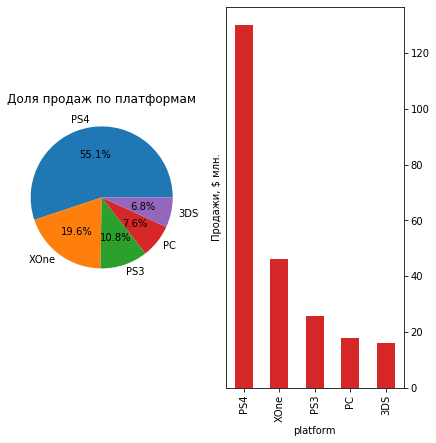

In [44]:
top_5_platforms_of_region(eu_region, 'eu_sales')

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.22
Racing          14.13
Name: eu_sales, dtype: float64

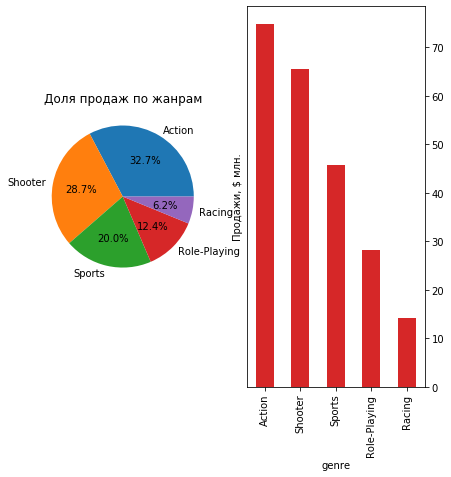

In [45]:
top_5_genres_of_region(eu_region, 'eu_sales')

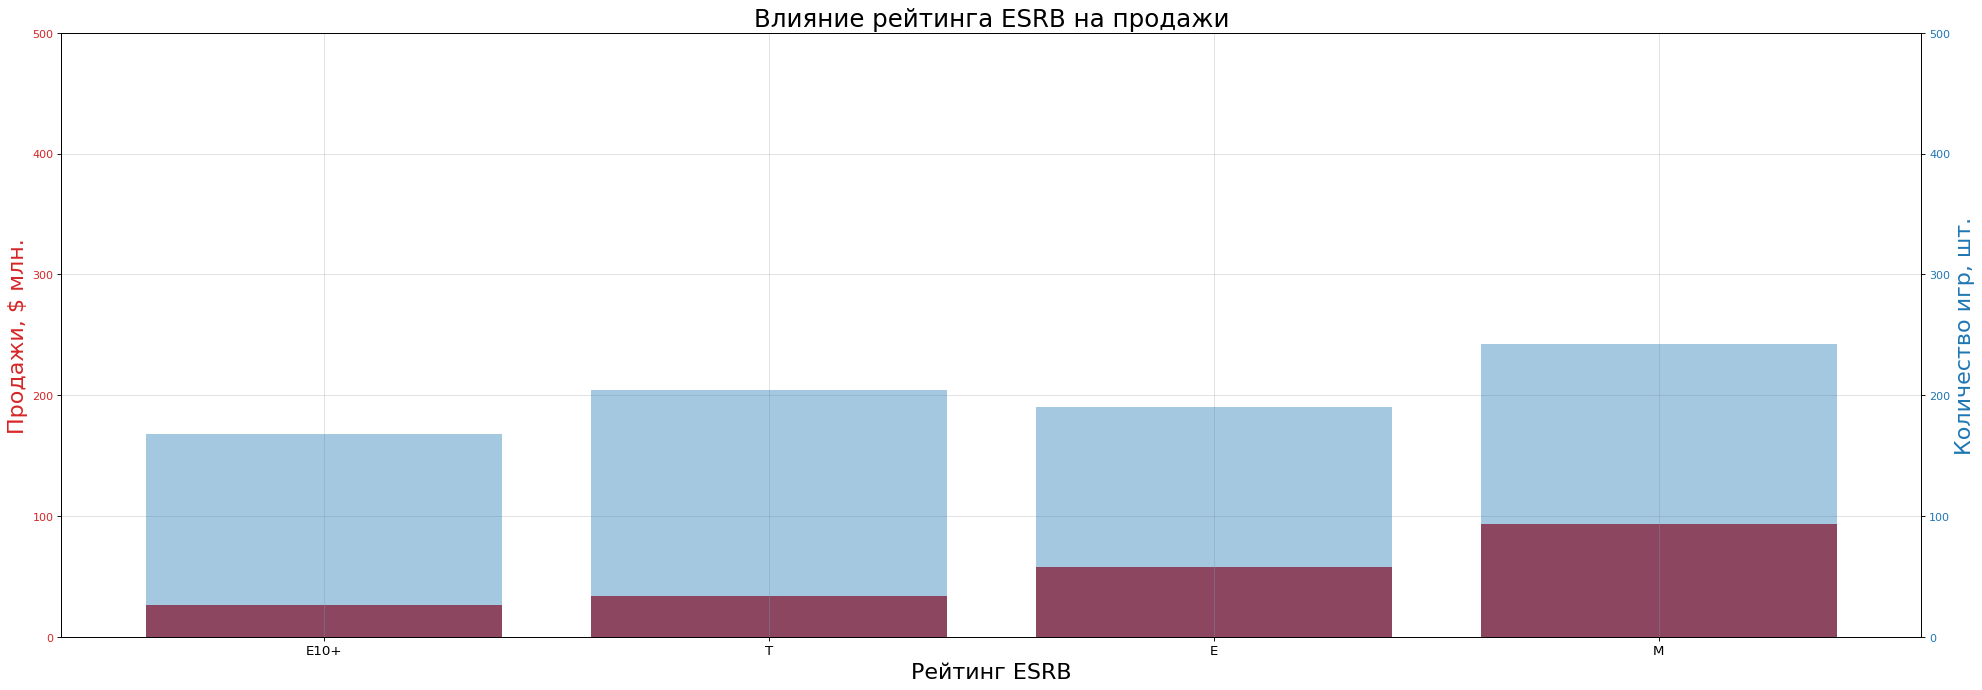

,rating,"Продажи, $ млн.","Количество игр, шт."
1,E10+,26.16,168
3,T,34.12,204
0,E,58.06,190
2,M,93.44,242


In [46]:
influence_ESRB(eu_region, 'eu_sales')

>Пользователи в Европе предпочитают, в большей части, платформы PS4, XOne.  
Жанры Action и Shooter   
Максимальный по продажам рейтинг ESRB: "M" - для взрослых

### Регион JP (Japan)

Проделаем тоже самое для региона Япония:

In [47]:
jp_region = (df.query('year_of_release >= 2014 & jp_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'rating']])
jp_region

,name,platform,year_of_release,genre,jp_sales,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,NaN
42,Grand Theft Auto V,PS4,2014,Action,0.38,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.10,NaN
77,FIFA 16,PS4,2015,Sports,0.06,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,0.22,NaN
...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.01,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.01,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,NaN


platform
3DS     44.24
PS4     15.02
PSV     14.61
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

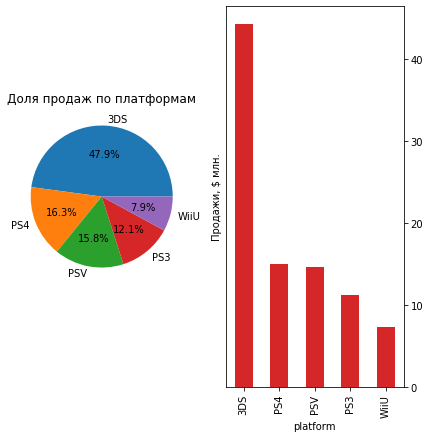

In [48]:
top_5_platforms_of_region(jp_region, 'jp_sales')

genre
Role-Playing    31.23
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

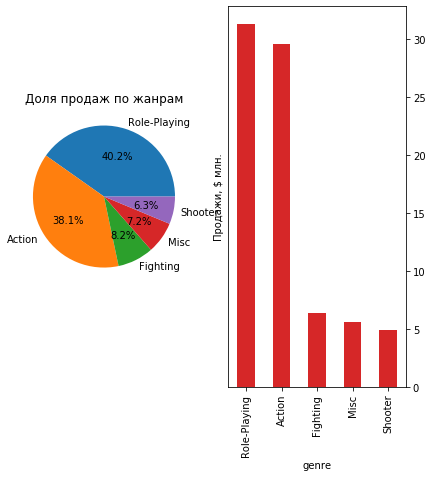

In [49]:
top_5_genres_of_region(jp_region, 'jp_sales')

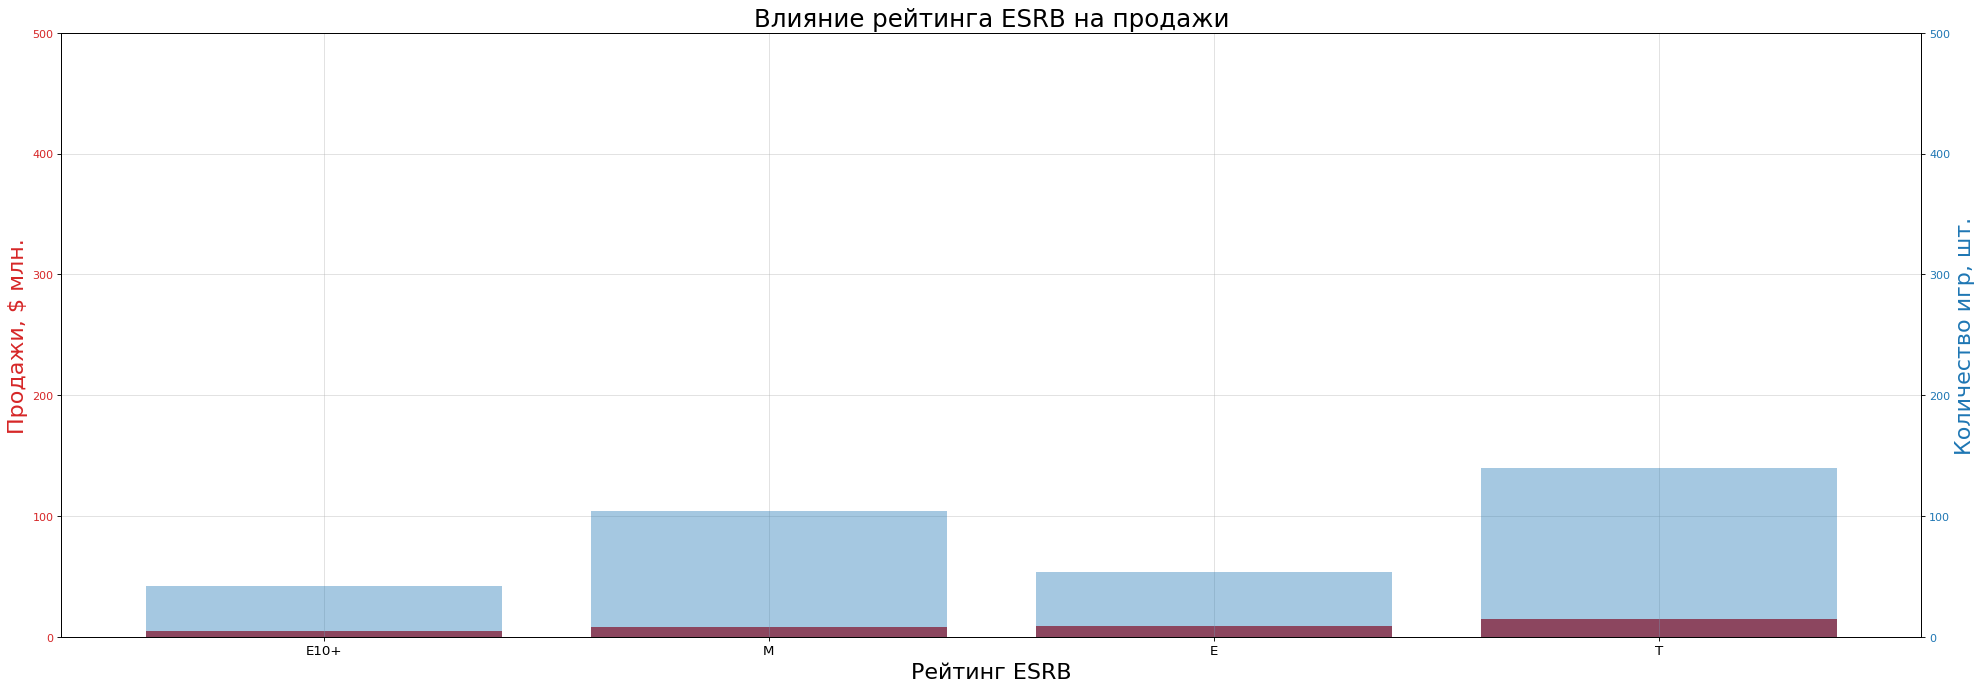

,rating,"Продажи, $ млн.","Количество игр, шт."
1,E10+,4.46,42
2,M,8.01,104
0,E,8.94,54
3,T,14.85,140


In [50]:
influence_ESRB(jp_region, 'jp_sales')

>Пользователи в Японии предпочитают, в большей части, платформу 3DS.  
Жанры Role-Playing и Action   
Максимальный по продажам рейтинг ESRB: "Т" - для подростков, "M" - для взрослых

### Регион OW (Other world)

Проделаем тоже самое для остального мира:

In [51]:
other_world_region = (df.query('year_of_release >= 2014 & other_sales != 0 ')
             .loc[:, ['name', 'platform', 'year_of_release', 'genre', 'other_sales', 'rating']])
other_world_region

,name,platform,year_of_release,genre,other_sales,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,2.38,NaN
42,Grand Theft Auto V,PS4,2014,Action,1.97,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,0.74,NaN
77,FIFA 16,PS4,2015,Sports,1.28,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,1.28,NaN
...,...,...,...,...,...,...
14544,Looney Tunes: Galactic Sports,PSV,2015,Action,0.01,NaN
14707,Superdimension Neptune vs Sega Hard Girls,PSV,2016,Role-Playing,0.01,T
14871,Resident Evil 5 HD,PS4,2016,Action,0.01,NaN
14872,Aegis of Earth: Protonovus Assault,PSV,2016,Action,0.01,T


platform
PS4     44.48
XOne    12.52
PS3      9.37
X360     4.35
3DS      3.68
Name: other_sales, dtype: float64

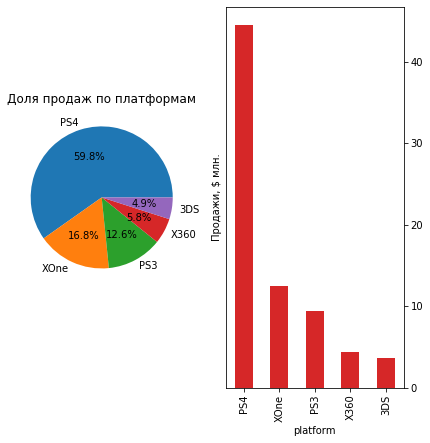

In [52]:
top_5_platforms_of_region(other_world_region, 'other_sales')

genre
Action          22.57
Shooter         21.53
Sports          14.36
Role-Playing     8.67
Misc             4.03
Name: other_sales, dtype: float64

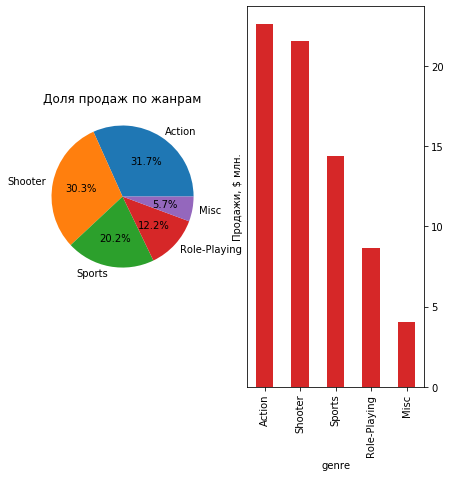

In [53]:
top_5_genres_of_region(other_world_region, 'other_sales')

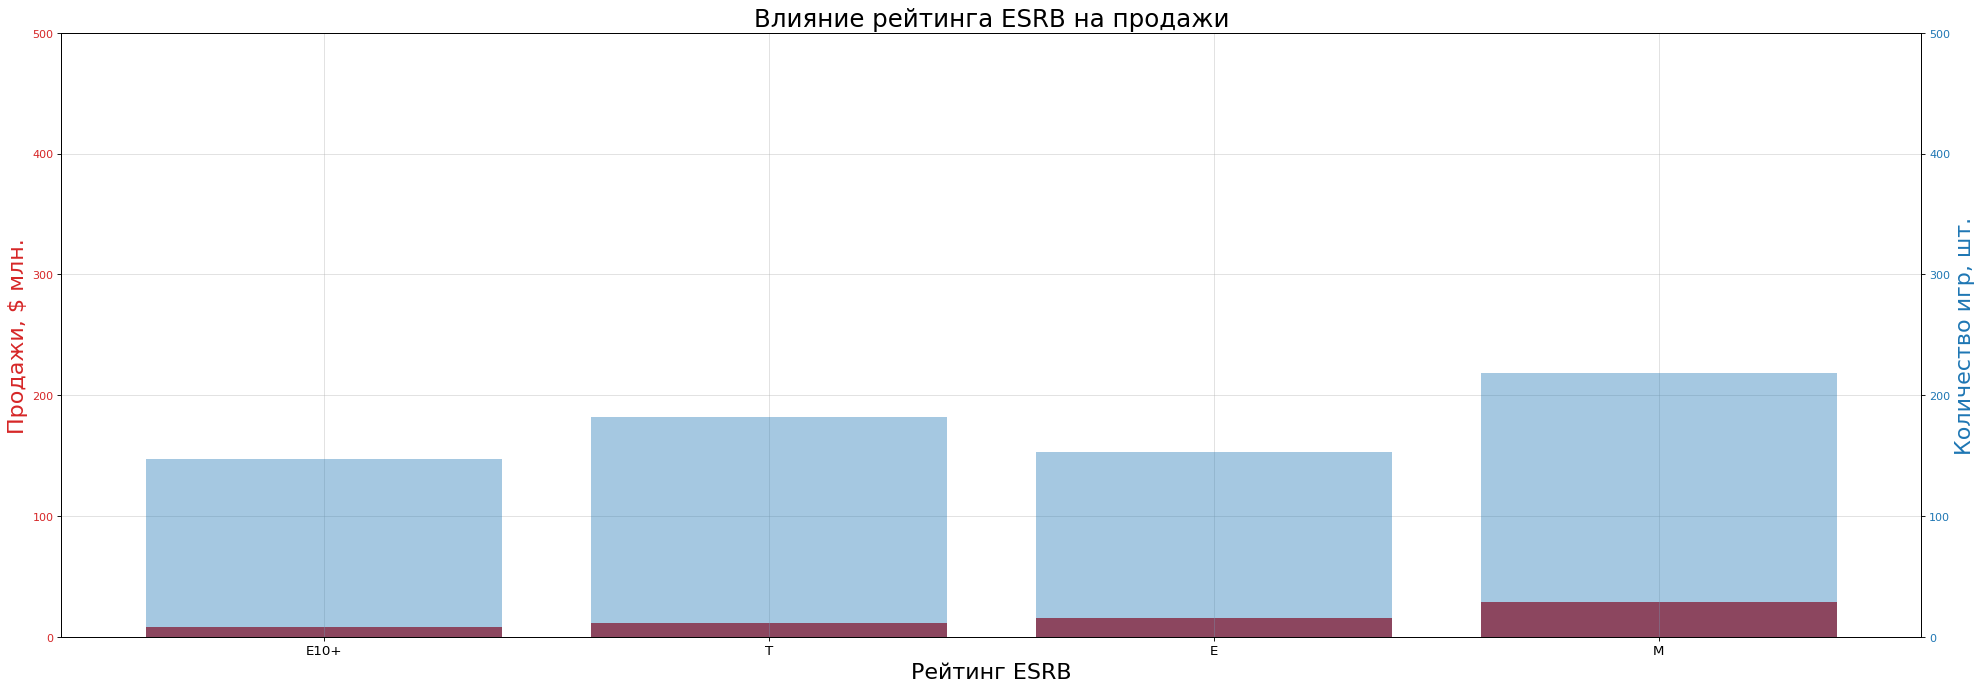

,rating,"Продажи, $ млн.","Количество игр, шт."
1,E10+,7.83,147
3,T,11.36,182
0,E,15.39,153
2,M,28.67,218


In [54]:
influence_ESRB(other_world_region, 'other_sales')

>Пользователи в остальном мире предпочитают, в большей части, платформы PS4, XOne.  
Жанры Action и Shooter   
Максимальный по продажам рейтинг ESRB: "M" - для взрослых  

### Выводы по главе 4:

Портрет пользователя в NA:
- предпочитает играть в PS4, меньше XOne, X360, 3DS
- любит жанры Action и Shooter с рейтингом для взрослых
Пользователи характеризируются склонностью к играм с насилием, откровенными сценами, ненормативной лексикой, более реалистичные игры. Используют в основном приставки Sony.  

Портрет пользователя в EU:
- предпочитает играть в платформы PS4, XOne
- любит жанры Action и Shooter с рейтингом для взрослых
Пользователи характеризируются склонностью к играм с насилием, откровенными сценами, ненормативной лексикой, более реалистичные игры. Используют в основном приставки Sony PS4.

Портрет пользователя в JP:
- предпочитает играть в платформу 3DS
- любит жанры Role-Playing и Action с рейтингом "Т" - для подростков , "M" - для взрослых 
Пользователи характеризируются склонностью к играм фентези, с отсутствием ярко выраженного насилия, предпочитая игры более мягкого рейтинга. Используют в основном приставки Nintendo 3DS.

Портрет пользователя в OW:
- характеризуется портретом пользователей из Европы

## Глава 5. Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Найдем средние пользовательские рейтинги платформ Xbox One и PC

In [55]:
xone_user_rating = df.query('year_of_release >= 2014 and platform == "XOne"')['user_score'].dropna()
xone_user_rating.mean()

6.594545454545456

In [56]:
pc_user_rating = df.query('year_of_release >= 2014 and platform == "PC"')['user_score'].dropna()
pc_user_rating.mean()

6.298360655737705

Сформируем нулевую гипотезу H₀ - "Средние пользовательские рейтинги платформ Xbox One и PC равны". Тогда альтернативная гипотеза H₁ формирует следующие утверждение: "Средние пользовательские рейтинги платформ Xbox One и PC различается"

In [57]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone_user_rating, pc_user_rating, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


~~Полученное p-значение не позволяет отвергнуть нулевую гипотезу и говорит о том, что "Средние пользовательские рейтинги платформ Xbox One и PC равны"~~. **Отвергнуть нулевую гипотезу не получилось**. С вероятностью в 10% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между cредние пользовательскими рейтингами платформ Xbox One и PC (включая тех, кто не поставил рейтинг игре).

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем нулевую гипотезу H₀ - "Средние пользовательские рейтинги жанров Action и Sports не отличаются". Тогда альтернативная гипотеза H₁ формирует следующие утверждение: "Средние пользовательские рейтинги жанров Action и Sports разные"

In [58]:
action_user_rating = df.query('year_of_release >= 2014 and genre == "Action"')['user_score'].dropna()
action_user_rating.mean()

6.760606060606061

In [59]:
sports_user_rating = df.query('year_of_release >= 2014 and genre == "Sports"')['user_score'].dropna()
sports_user_rating.mean()

5.2251968503937

In [60]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученное p-значение позволяет отвергнуть нулевую гипотезу и говорит о том, что "Средние пользовательские рейтинги жанров Action и Sports разные", рейтинг жанра Action выше, чем у жанра Sports.    
Получить подтверждение нулевой гипотезы ничтожно мало(гораздо меньше критического уровеня статистической значимости в 0.05)

### Выводы по главе 5:
Проверка 1 гипотезы показала, что cредние пользовательские рейтинги платформ Xbox One и PC равны, что предполагает такое же распределение у тех пользователей, кто не поставил рейтинг игре.  
Проверка 2 гипотезы показала, что Средние пользовательские рейтинги жанров Action и Sports разные, у жанра Action оценки пользователей выше, что предполагает о таком же распределение в генеральной совокупности(т.е. все пользователи игры, включая не поставивших рейтинг игре)

## Глава 6. Общий вывод

Исходя из полученных данных исследования можно сделать следующие выводы о продажах в 2017 году:
- Актуальный период для прогноза 2-3 года, т.е. с 2014 года, при том что каждая платформа проводит около 7 лет на рынке, пока ее полностью не заменит следующая модель или попросту выйдет из моды. Пользователи стали более требовательны к качеству игр и разработчики перешли от количества к качеству самих игр.
- Из всех платформ только PS4, XOne на восходящем тренде, остальные в нисходящем тренде. Что не удивительно, т.к. платформы вышли недавно.
- Потенциально прибыльные платформы PS4, XOne, 3DS, PS3, WiiU, X360, PC, PSV
- По продажам лидируют PS3, PS4, WiiU, X360, XOne
- Отзывы критиков влияют на продажи(как правило они выходят до релиза и разогревают интерес к ингре), но не всегда. А отзывы пользователей не влияют на продажи, т.к. часто выходят долгожданныеи прибыльные, но провальные игры
- Самые высокие продажи в жанрах Action, Shooter, Role-Playing, Sports, низкие в Pazzle, Strategy, Adventure, Simulation
- Необходимо учитывать портрет пользователя для рекламных компаниях в каждом регионе.  
 Для NA предпочтительнее:
 - платформы PS4, XOne, X360, 3DS
 - жанры Action и Shooter с рейтингом для взрослых

 Для EU и "Остального мира" предпочтительнее:
 - платформы PS4, XOne
 - жанры Action и Shooter с рейтингом для взрослых

 Для JP предпочтительнее:
 - платформа 3DS
 - жанры Role-Playing и Action с рейтингом  "Т" - для подростков , "M" - для взрослых
- Проверенная гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась, что вероятно говорит о том, что игры на Xbox One и PC в среднем очень близки по ожиданиям пользователей и вероятно много игр выпускается сразу на XOne и PC
- Проверенная гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" подтвердилась. Пользователи любят больше Action, а разработчики игр дают пользователям качественные игры, в то время как Sports игры не оправдывают ожидания пользователей так же как Action жанр. 


In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))